## Reading Input

In [ ]:
import pandas as pd
from proj_utils.input_interpreter import format_input

In [ ]:
customer_df = pd.read_excel('data/2_detail_table_customers.xls')
deposit_df = pd.read_excel('data/4_detail_table_depots.xls')
routes = customer_df['ROUTE_ID'].unique()

In [6]:
from proj_utils.fake_input_generator import generator
from proj_utils.input_interpreter import format_input

import matplotlib.pyplot as plt

from VRP.greedy_solutions import nearest_neighbour_solution
from VRP.modify_solution import combined_rand_modification
from VRP.verify_solution import valid_path, calculate_path_distance

from proj_utils.path import print_path

from solver_step import SolverStep
%matplotlib widget

# Simulated Annealing Solution

In [ ]:
import simulated_annealing.solver as SA # Simulated anealing solver

In [ ]:
#dists, demand, points = format_input(routes[2],customer_df,deposit_df)
dists, demand, points = generator(20)

In [ ]:
eval_function = lambda x: calculate_path_distance(x, dists) if(valid_path(x,(30,20),demand)) else float('inf')
solver_step = SA.generic_solver_factory(
    lambda x: combined_rand_modification(x, len(points)),
    eval_function,
    )

In [ ]:
init_state = nearest_neighbour_solution(dists, demand, (30,20))
init_step = SolverStep(init_state, eval_function(init_state),100)
step_1 = solver_step(init_step)
print(step_1.get_best_sol())
print(step_1.get_best_sol_value())

In [ ]:
step = step_1

In [ ]:
step = solver_step(step)
print(step.get_best_sol())
print(step.get_best_sol_value())

# Taboo Search

In [ ]:
import taboo_search.solver as TS

In [ ]:
dists, demand, points = generator(20)

In [ ]:
taboo_list_size = 10
solver_step = TS.taboo_search_solver_factory(
    lambda x: combined_rand_modification(x, len(points)),
    lambda x: calculate_path_distance(x, dists) if(valid_path(x,(30,20),demand)) else float('inf'),
    taboo_list_size
    )

In [ ]:
init_state = nearest_neighbour_solution(dists, demand, (30,20))
init_step = SolverStep(init_state, eval_function(init_state),2)
step_1 = solver_step(init_step)
print(step_1.get_best_sol())

In [ ]:
step = step_1

In [ ]:
step = solver_step(step)
print(step.get_best_sol())
print(step.get_best_sol_value())

# Q-learning

In [7]:
from VRP.greedy_solutions import nearest_neighbour_solution
from VRP.modify_solution_routes import remove_smallest_route
from VRP.modify_solution_routes import remove_random_route
from VRP.modify_solution_routes import split_biggest_route
from VRP.modify_solution_routes import split_random_route
from VRP.modify_solution import rand_opt_n
from VRP.modify_solution import rand_reverse_section
from q_learning import *

from proj_utils.fake_input_generator import generator

capacity = (10,4)

dists, demand, points = generator(20)
path = nearest_neighbour_solution(dists, demand, (30,5))

function_list = [
    lambda x: rand_opt_n(x, len(dists)),
    lambda x: remove_smallest_route(x,len(dists),dists),
    lambda x: remove_random_route(x,len(dists),dists),
    lambda x: split_biggest_route(x, len(dists), dists),
    lambda x: split_random_route(x,len(dists), dists),
    #lambda x: rand_reverse_section(x, len(dists))
]

q = q_learning_obj(0,init_q_learning_table(len(function_list)),len(function_list), 0.9, 0.1)
eval_function = lambda x: calculate_path_distance(x, dists) if(valid_path(x,capacity,demand)) else float('inf')

In [8]:
import taboo_search.solver as TS
taboo_list_size = 10
solver_step = TS.taboo_search_solver_factory(
    lambda x: q_learning_iteration(x,q,function_list,eval_function),
    eval_function,
    taboo_list_size
    )

[0, 1, 18, 12, 7, 0, 16, 19, 13, 8, 0, 5, 4, 11, 17, 0, 14, 3, 6, 15, 0, 2, 10, 9, 0]
[0, 1, 7, 16, 0, 18, 9, 0, 4, 5, 8, 13, 0, 19, 17, 11, 12, 0, 14, 3, 6, 15, 0, 2, 10, 0]


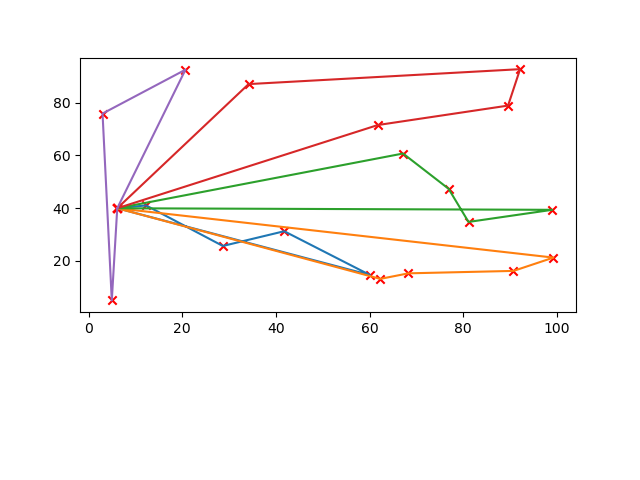

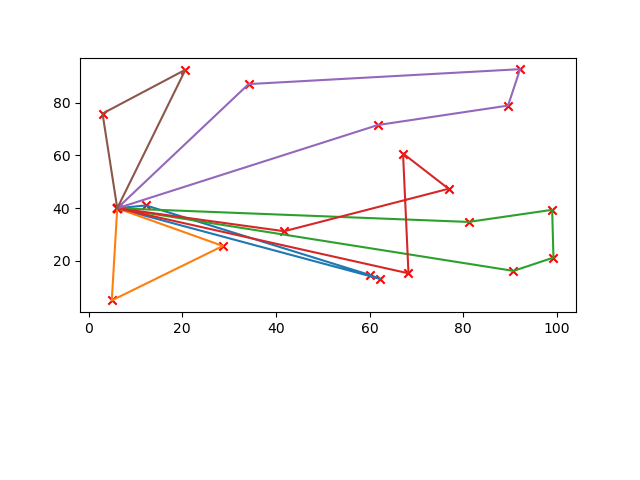

In [9]:
from solver_step import SolverStep
init_state = nearest_neighbour_solution(dists, demand, capacity)
init_step = SolverStep(init_state, eval_function(init_state),200)
print(init_state)
step_1 = solver_step(init_step)

print(step_1.get_best_sol())
print_path(points, init_step.get_best_sol())
print_path(points, step_1.get_best_sol())